In [55]:
import pandas as pd
data=pd.read_csv('../data/processed_data.csv')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

Split the dataset into training (80%) and testing (20%) sets.

In [43]:
X=data.drop('target',axis=1)
y=data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Logistic Regression

In [44]:
LogisticModel = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

LogisticModel.fit(X_train, y_train)
yPred = LogisticModel.predict(X_test)
acc = accuracy_score(y_test, yPred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.5833


C:\Users\mazen\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [45]:
DTModel=DecisionTreeClassifier(random_state=42)
DTModel.fit(X_train,y_train)
DTModel=DTModel.predict(X_test)
print("Decision Tree Accuracy : ",accuracy_score(y_test,DTModel))
print("Decision Tree Report : \n",classification_report(y_test,DTModel))

Decision Tree Accuracy :  0.5833333333333334
Decision Tree Report : 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        33
           1       0.20      0.18      0.19        11
           2       0.62      0.62      0.62         8
           3       0.33      0.33      0.33         6
           4       0.00      0.00      0.00         2

    accuracy                           0.58        60
   macro avg       0.38      0.39      0.38        60
weighted avg       0.56      0.58      0.57        60



Random Forest

In [47]:
RFModel=RandomForestClassifier(random_state=42)
RFModel.fit(X_train,y_train)
RFModel=RFModel.predict(X_test)
print("Random Forest Accuracy : ",accuracy_score(y_test,RFModel))
print("Random Forest Report : \n",classification_report(y_test,RFModel))

Random Forest Accuracy :  0.55
Random Forest Report : 
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        33
           1       0.00      0.00      0.00        11
           2       0.30      0.38      0.33         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.55        60
   macro avg       0.20      0.26      0.23        60
weighted avg       0.43      0.55      0.48        60



Support Vector Machine (SVM)

In [51]:
SVMModel=SVC(kernel='linear',random_state=42)
SVMModel.fit(X_train,y_train)
SVMModel=SVMModel.predict(X_test)
print("Support Vector Machine Accuracy : ",accuracy_score(y_test,SVMModel))
print("Support Vector Machine Report : \n",classification_report(y_test,SVMModel))

Support Vector Machine Accuracy :  0.6
Support Vector Machine Report : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.33      0.27      0.30        11
           2       0.50      0.25      0.33         8
           3       0.20      0.33      0.25         6
           4       0.00      0.00      0.00         2

    accuracy                           0.60        60
   macro avg       0.36      0.35      0.34        60
weighted avg       0.58      0.60      0.58        60



C:\Users\mazen\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mazen\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mazen\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [57]:
X = data.drop("target", axis=1)
y = data["target"]
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)


ROC Curve - Decision Tree

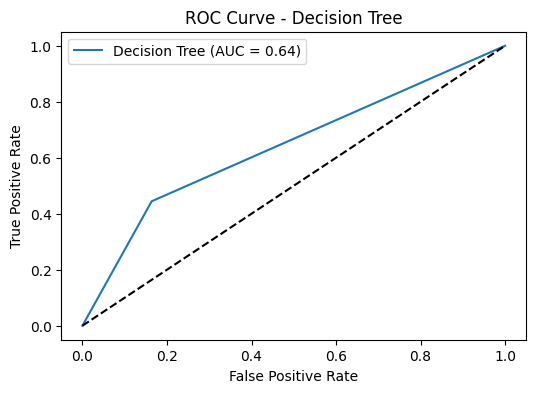

In [ ]:
data_clf=OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
data_clf.fit(X_train, y_train)
y_score=data_clf.predict_proba(X_test)
fpr_dt,tpr_dt,_=roc_curve(y_test.ravel(),y_score.ravel())
roc_auc_dt=auc(fpr_dt, tpr_dt)

plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

ROC Curve - Random Fores

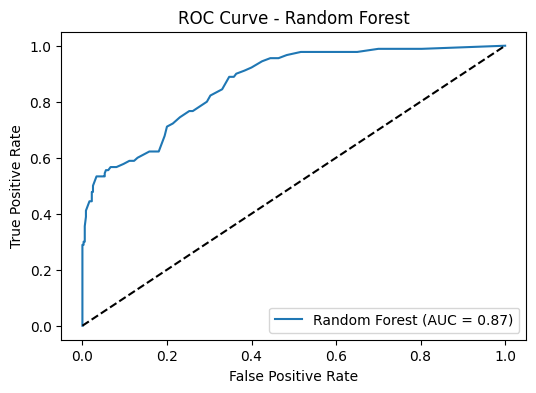

In [ ]:
rf_clf=OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_clf.fit(X_train,y_train)
y_score_rf=rf_clf.predict_proba(X_test)
fpr_rf,tpr_rf,_=roc_curve(y_test.ravel(), y_score_rf.ravel())
roc_auc_rf=auc(fpr_rf,tpr_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf,tpr_rf,label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


ROC Curve - SVM

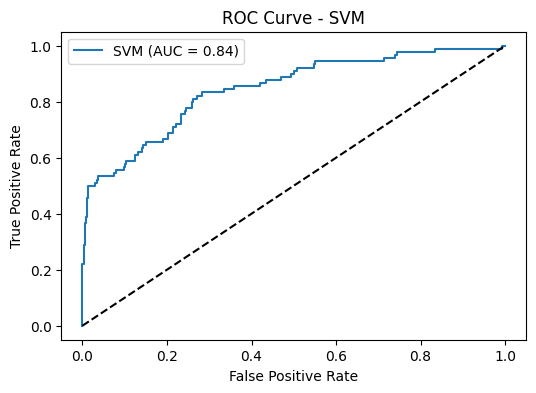

In [60]:
svm_clf=OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
svm_clf.fit(X_train, y_train)
y_score_svm=svm_clf.predict_proba(X_test)
fpr_svm,tpr_svm,_=roc_curve(y_test.ravel(), y_score_svm.ravel())
roc_auc_svm=auc(fpr_svm,tpr_svm)

plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()
